In [46]:
#Import libraries
import pandas as pd
import numpy as np
import pylab as plt
%matplotlib inline

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

In [6]:
#Import the data
titanic = pd.read_csv('titanic.csv')

In [7]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
titanic.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [58]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

Text(0.5,1,'Age Histogram')

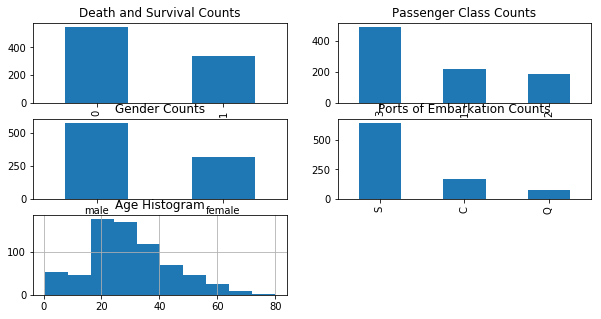

In [59]:
# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
titanic['Survived'].value_counts().plot(kind='bar', 
                                         title='Death and Survival Counts')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
titanic['Pclass'].value_counts().plot(kind='bar', 
                                       title='Passenger Class Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
titanic['Sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1 ))
titanic['Embarked'].value_counts().plot(kind='bar', 
                                         title='Ports of Embarkation Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
titanic['Age'].hist()
plt.title('Age Histogram')

In [28]:
#Crosstab for P-type and survived
pclass_survived = pd.crosstab(titanic['Pclass'], titanic['Survived'])
pclass_survived

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [29]:
# Normalize it to percentage
pclass_survived_per = pclass_survived.div(pclass_survived.sum(1).astype(float), axis=0)
pclass_survived_per

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


Text(0,0.5,'Survival Rate')

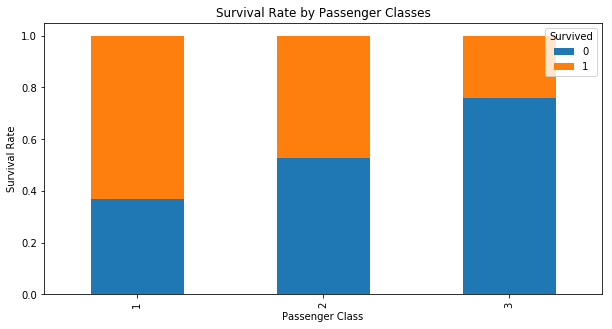

In [70]:
#plotting the crosstab
pclass_survived_per.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

In [66]:
#Converting males and females in binary... 0 for Female and 1 for Male
SexN = sorted(titanic['Sex'].unique())
SexN
genders = dict(zip(SexN, range(0, len(SexN) + 1)))
genders
titanic['SexN'] = titanic['Sex'].map(genders).astype(int)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [67]:
#Crosstab for sexN and survived
SexN_survived = pd.crosstab(titanic['SexN'], titanic['Survived'])
SexN_survived


Survived,0,1
SexN,,
0,81,233
1,468,109


In [68]:
# Normalize it to percentage
SexN_survived_per = SexN_survived.div(SexN_survived.sum(1).astype(float), axis=0)
SexN_survived_per

Survived,0,1
SexN,,
0,0.257962,0.742038
1,0.811092,0.188908


Text(0,0.5,'Survival Rate')

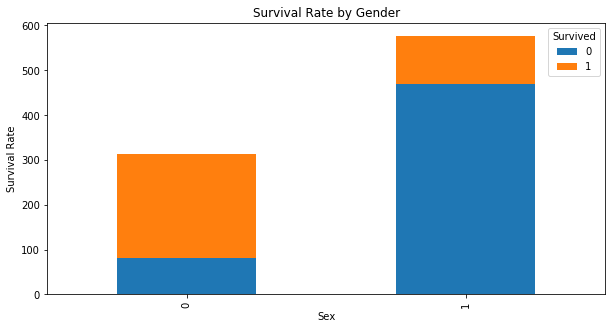

In [71]:
#plotting the crosstab
SexN_survived.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Gender')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

In [73]:
# Get the unique values of Pclass:
passenger_class = sorted(titanic['Pclass'].unique())
passenger_class
for p_class in passenger_class:
    print('M: ', p_class, len(titanic[(titanic['Sex'] == 'male') & 
                             (titanic['Pclass'] == p_class)]))
    print('F: ', p_class, len(titanic[(titanic['Sex'] == 'female') & 
                             (titanic['Pclass'] == p_class)]))

M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


Text(0,0.5,'Survival Rate')

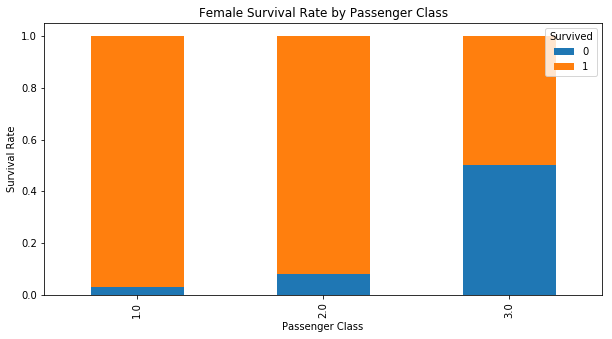

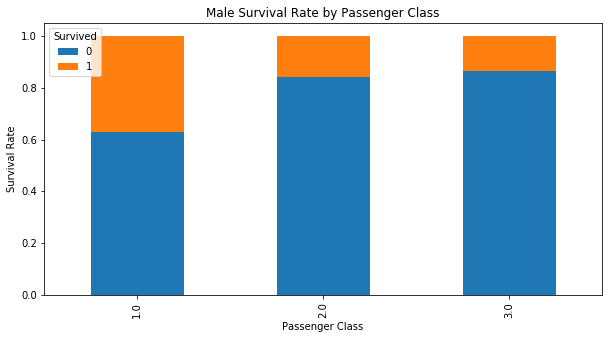

In [75]:
# Plot survival rate by Sex
females_df = titanic[titanic['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], titanic['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Plot survival rate by Pclass
males_df = titanic[titanic['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], titanic['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')



In [76]:
titanic[titanic['Embarked'].isnull()]

#No Null Values


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexN


In [77]:
#Lets check the distribution of people across each Embarked category
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [78]:
#Creating columns for analytics purpose
titanic = pd.get_dummies(titanic, columns= ['Embarked'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,SexN,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,0,0,1


In [79]:
#Null values check for Age
titanic[titanic['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


In [86]:
#Imputation for Age column
titanic['Age_Imp'] = titanic['Age']

# Populate AgeFill
titanic['Age_Imp'] = titanic['Age_Imp'] \
                        .groupby([titanic['SexN'], titanic['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

In [88]:
len(titanic[titanic['Age_Imp'].isnull()])

0

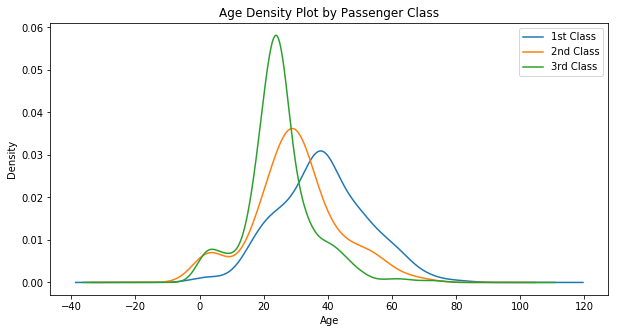

In [90]:
for pclass in passenger_class:
    titanic.Age_Imp[titanic.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

In [91]:
#Calculating the family size
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,SexN,Embarked_C,Embarked_Q,Embarked_S,Age_Imp,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,0,1,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,0,0,1,35.0,0


Text(0.5,1,'Family Size Histogram')

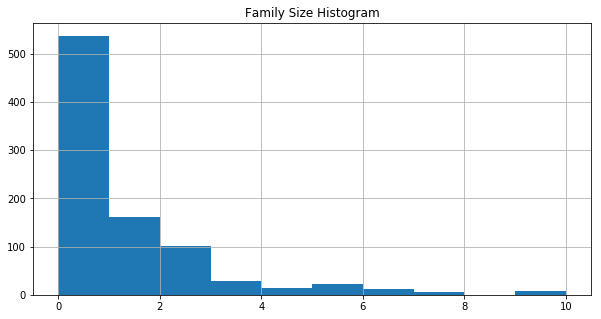

In [92]:
titanic['FamilySize'].hist()
plt.title('Family Size Histogram')

C:\Users\apurv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Survivors by Family Size')

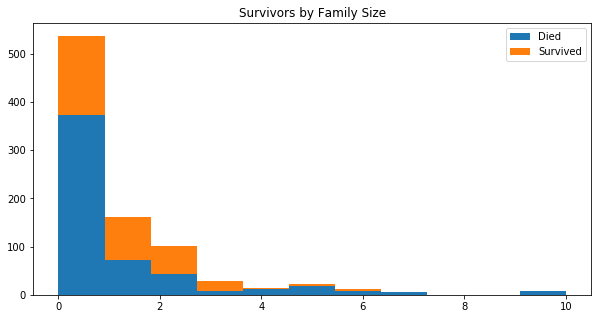

In [93]:
family_sizes = sorted(titanic['FamilySize'].unique())
max_family_size = max(family_sizes)

df1 = titanic[titanic['Survived'] == 0]['FamilySize']
df2 = titanic[titanic['Survived'] == 1]['FamilySize']
plt.hist([df1, df2], 
         bins=max_family_size + 1, 
         range=(0, max_family_size), 
         stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')

In [98]:
df2 = titanic[titanic['Survived'] == 1]
df2

1      38.00
2      26.00
3      35.00
8      27.00
9      14.00
10      4.00
11     58.00
15     55.00
17       NaN
19       NaN
21     34.00
22     15.00
23     28.00
25     38.00
28       NaN
31       NaN
32       NaN
36       NaN
39     14.00
43      3.00
44     19.00
47       NaN
52     49.00
53     29.00
55       NaN
56     21.00
58      5.00
61     38.00
65       NaN
66     29.00
       ...  
809    33.00
820    52.00
821    27.00
823    27.00
827     1.00
828      NaN
829    62.00
830    15.00
831     0.83
835    39.00
838    32.00
839      NaN
842    30.00
849      NaN
853    16.00
855    18.00
856    45.00
857    51.00
858    24.00
862    48.00
865    42.00
866    27.00
869     4.00
871    47.00
874    28.00
875    15.00
879    56.00
880    25.00
887    19.00
889    26.00
Name: Age, Length: 342, dtype: float64